# Assignment 3

### Dibya Bharati Pradhan
### Roll No- 1911067 

In [97]:
import sys
sys.path.append('/home/dibya/Documents/Dibya/Academic_Courses/Assignment_3/')  # Add directory containing notebook to path

In [98]:

import matplotlib.pyplot as plt
import math
import numpy as np
from scipy import stats

%run Dibya_CPL_library_final.ipynb

## Q-1a

In [99]:
A = np.array([[4, 2/3, -4/3, 4/3], 
                [2/3, 4, 0, 0], 
                [-4/3, 0, 6, 2], 
                [4/3, 0, 2, 6]])

tol = 1e-6

#below if the initial guess
x = np.ones(len(A))  
y = x

eval, evec, c = eval_evector_Power_method(A, x, y, tol) 

print("The dominant eigenvalue is ", np.round(eval, 4), "and the normalised eigenvector is ", np.round(evec, 4))
print("Number of iterations it took is ", c)

The dominant eigenvalue is  8.0 and the normalised eigenvector is  [0.     0.     0.7071 0.7071]
Number of iterations it took is  45


## Q-1b

In [100]:
A = np.array([[4, 2/3, -4/3, 4/3], 
                [2/3, 4, 0, 0], 
                [-4/3, 0, 6, 2], 
                [4/3, 0, 2, 6]])

eval = eval_QR_factorisation(A)
print("The eigenvalues are", eval)

The eigenvalues are [6.0, 4.0, 8.0, 2.0]


## Q-2a


Covariance matrix:
[[ 0.05595529 -0.25917649 -0.1250564  -0.05338708]
 [-0.02019591  0.3732283   0.64369425  0.04671977]
 [ 0.00249815  0.18926241 -0.3993122   0.71869473]
 [ 0.00345973  0.03008641 -0.22993924 -0.82105463]]

Coefficients of the polynomial fitted:
[  0.57465867   4.72586144 -11.12821778   7.66867762]

Condition number:  35.863147894664806


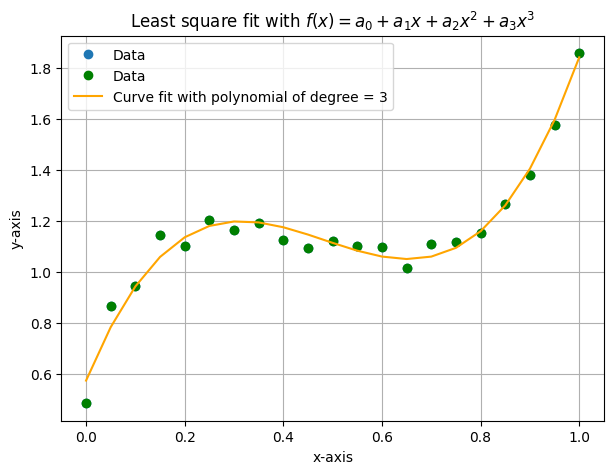

In [101]:

with open('assign3fit.txt', 'r') as file:
    data = [[float(num) for num in line.split(' ')] for line in file]
data = np.array(data)
x_data, y_data = data[:, 0], data[:, 1]


solution_coeffs, covariance_matrix = poly_fit(x_data, y_data, 3)


print("\nCovariance matrix:")
print(covariance_matrix)


print("\nCoefficients of the polynomial fitted:")
print(solution_coeffs)


condition_number = np.linalg.cond(covariance_matrix, 1)
print("\nCondition number: ", condition_number)

plt.figure(figsize=(7, 5))
plt.plot(x_data, y_data, 'o', label='Data') 
plot_graph_poly(x_data, y_data, solution_coeffs, 3) 
plt.title(r"Least square fit with $f(x) = a_0 + a_1x + a_2x^2 + a_3x^3$")
plt.legend()
plt.show()


## Q-2b

Coefficients of the fitted polynomial are
[1.15947393 0.36666895 0.04124152 0.1666964 ]

Covariance matrix is
[[5.55439983e-02 3.95771987e-18 2.99673641e-02 5.33538115e-17]
 [2.07654752e-17 1.31658868e-01 1.04884687e-18 3.75031863e-02]
 [2.97185652e-02 7.55452373e-19 1.12377615e-01 1.27107388e-17]
 [5.20754214e-17 4.86070011e-03 3.84697642e-19 1.01910832e-01]]

Condition number:  3.7797584043100394
$Φ_i$ are modified Chebyshev functions


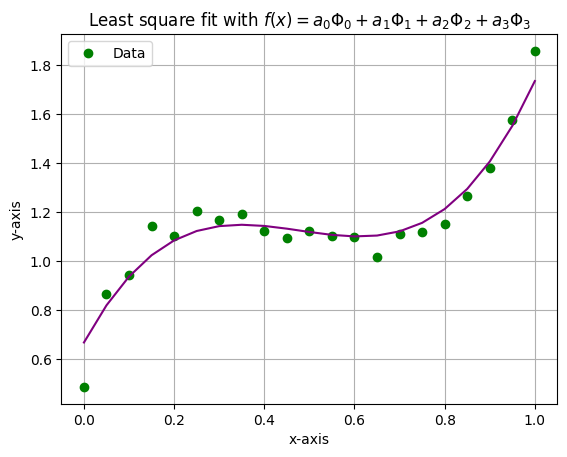

In [102]:
# Read input data from text file
with open('assign3fit.txt', 'r') as file:
    data = [[float(num) for num in line.split(' ')] for line in file]
data = np.array(data)
x_data, y_data = data[:, 0], data[:, 1]

# Fit the data using Chebyshev polynomials
solution_coeffs, covariance_matrix = chebyshev_fit(x_data, y_data, 3)

# Print solution coefficients
print("Coefficients of the fitted polynomial are")
print(solution_coeffs)

# Print covariance matrix
print("\nCovariance matrix is")
print(covariance_matrix)

# Calculate condition number
condition_number = np.linalg.cond(covariance_matrix, 1)
print("\nCondition number: ", condition_number)

# Calculate the fitted values
y_fit = [sum(solution_coeffs[j] * chebyshev(data_point, j) for j in range(len(solution_coeffs))) for data_point in x_data]

# Plotting
plt.plot(x_data, y_data, 'go', label="Data")
plt.plot(x_data, y_fit, color='purple')
plt.title(r"Least square fit with $f(x)=a_0 Φ_0 + a_1 Φ_1 + a_2 Φ_2 + a_3 Φ_3$")
print("$Φ_i$ are modified Chebyshev functions")
plt.ylabel("y-axis")
plt.xlabel("x-axis")
plt.legend()
plt.grid()

plt.show()


### The condition number for Chebyshev fitting (3.7798) is significantly lower than that for Cubic Least Square Fitting (35.8631). A lower condition number indicates that the fitting parameters are less likely to change significantly due to small perturbations in the data.
### Therefore, Chebyshev fitting is less sensitive to small perturbations in the data compared to Cubic Least Square Fitting.

## Q-3

Grade categories: ['A' 'B' 'C' 'D' 'F']
Observed frequencies: [ 77 150 210 125  38]
Expected frequencies: [ 32.39457991 145.18243471 239.36536824 145.18243471  32.39457991]

Chi-square statistic: 68.95701662769245
Degrees of Freedom: 4

Critical Value at 5% significance level: 9.487729036781154
Critical Value at 10% significance level: 7.779440339734858



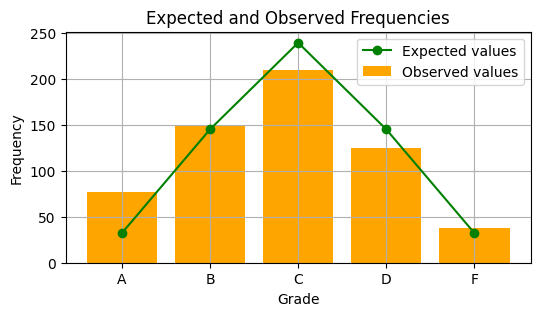

Null hypothesis rejected at 5% significance level: Distribution is not consistent with expected.
Null hypothesis rejected at 10% significance level: Distribution is not consistent with expected.


In [103]:
# Given data
Grade = np.array(['A', 'B', 'C', 'D', 'F'])     # Grade categories
G_No = np.arange(len(Grade))                    # Grade category numbers
Observed = np.array([77, 150, 210, 125, 38])    # Observed frequencies

def get_expected_normal_distribution(G_No, Observed):
    # Calculate probabilities for each grade category using the standard normal distribution
    def standard_normal_pdf(x):
        return np.exp(-0.5 * (x-np.mean(G_No))**2) / np.sqrt(2 * np.pi)

    Expected = standard_normal_pdf(G_No) * np.sum(Observed)

    return Expected

# Calculate expected frequencies using the standard normal distribution
Expected = get_expected_normal_distribution(G_No, Observed)

# Chi-square test statistic
chi2_statistic = np.sum((Observed - Expected)**2 / Expected)

# Degrees of freedom (number of categories - 1)
df = len(Grade) - 1

# Critical values for 5% and 10% level of significance
critical_value_5 = stats.chi2.ppf(0.95, df)
critical_value_10 = stats.chi2.ppf(0.90, df)

# Print test results
print("Grade categories:", Grade)
print("Observed frequencies:", Observed)
print("Expected frequencies:", Expected)
print()
print("Chi-square statistic:", chi2_statistic)
print("Degrees of Freedom:", df)
print()
print("Critical Value at 5% significance level:", critical_value_5)
print("Critical Value at 10% significance level:", critical_value_10)
print()

# Plot observed vs expected frequencies
plt.figure(figsize=(6, 3))
plt.bar(Grade, Observed, color='orange' , label='Observed values')
plt.plot(Grade, Expected, 'go-', label='Expected values')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.title('Expected and Observed Frequencies')
plt.legend()
plt.grid(True)
plt.show()

# Determine if null hypothesis is rejected or not
if chi2_statistic > critical_value_5:
    print("Null hypothesis rejected at 5% significance level: Distribution is not consistent with expected.")
else:
    print("Null hypothesis not rejected at 5% significance level: Distribution is consistent with expected.")

if chi2_statistic > critical_value_10:
    print("Null hypothesis rejected at 10% significance level: Distribution is not consistent with expected.")
else:
    print("Null hypothesis not rejected at 10% significance level: Distribution is consistent with expected.")


## Q-4 Ftest

In [104]:
# Data for focal length of two shipments in cm
FocalLength_X = np.array([4.65, 4.84, 4.59, 4.75, 4.63, 4.75, 4.58, 4.82, 4.86, 4.60, 4.77, 4.65, 4.80])
FocalLength_Y = np.array([4.75, 4.79, 4.74, 4.74, 4.77, 4.58, 4.81])

# Calculate mean and standard deviation of the two shipments
mean_X, std_dev_X = np.mean(FocalLength_X), np.std(FocalLength_X)
mean_Y, std_dev_Y = np.mean(FocalLength_Y), np.std(FocalLength_Y)

# Calculated F-statistic
F_statistic = std_dev_X**2 / std_dev_Y**2

# Critical value for 5% and 10% significance level
critical_value_5 = stats.f.ppf(0.95, len(FocalLength_X)-1, len(FocalLength_Y)-1)
critical_value_10 = stats.f.ppf(0.90, len(FocalLength_X)-1, len(FocalLength_Y)-1)

print("Mean and standard deviation of Shipment X:", np.round(mean_X, 4), np.round(std_dev_X, 4))
print("Mean and standard deviation of Shipment Y:", np.round(mean_Y, 4), np.round(std_dev_Y, 4))
print()
print("F-statistic:", F_statistic)
print("Critical Value at 5% significance level:", critical_value_5)
print("Critical Value at 10% significance level:", critical_value_10)
print()

if F_statistic > critical_value_5:
    print("5% significance level: Reject the null hypothesis. Indicates a significant difference in variances.")
else:
    print("5% significance level: Fail to reject the null hypothesis. No significant difference in variances.")

if F_statistic > critical_value_10:
    print("10% significance level: Reject the null hypothesis. Indicates a significant difference in variances.")
else:
    print("10% significance level: Fail to reject the null hypothesis. No significant difference in variances.")


Mean and standard deviation of Shipment X: 4.7146 0.0973
Mean and standard deviation of Shipment Y: 4.74 0.0697

F-statistic: 1.9499129829446638
Critical Value at 5% significance level: 3.9999353833188764
Critical Value at 10% significance level: 2.904720508833658

5% significance level: Fail to reject the null hypothesis. No significant difference in variances.
10% significance level: Fail to reject the null hypothesis. No significant difference in variances.


## Q-4 Ttest

In [105]:
# Data for focal length of two shipments in cm
FocalLength_X = np.array([4.65, 4.84, 4.59, 4.75, 4.63, 4.75, 4.58, 4.82, 4.86, 4.60, 4.77, 4.65, 4.80])
FocalLength_Y = np.array([4.75, 4.79, 4.74, 4.74, 4.77, 4.58, 4.81])

# Calculate mean and standard deviation of the two shipments
mean_X, std_dev_X = np.mean(FocalLength_X), np.std(FocalLength_X)
mean_Y, std_dev_Y = np.mean(FocalLength_Y), np.std(FocalLength_Y)

# Degrees of freedom
df = len(FocalLength_X) + len(FocalLength_Y) - 2

# Calculate the pooled standard deviation
pooled_std_dev = np.sqrt(((len(FocalLength_X)-1)*std_dev_X**2 + (len(FocalLength_Y)-1)*std_dev_Y**2) / df)

# Calculate t-statistic
t_statistic = (mean_X - mean_Y) / (pooled_std_dev)

# Critical value for 5% and 10% significance level
critical_value_5 = stats.t.ppf(0.95, df)
critical_value_10 = stats.t.ppf(0.90, df)

print("Mean and standard deviation of Shipment X:", np.round(mean_X, 4), np.round(std_dev_X, 4))
print("Mean and standard deviation of Shipment Y:", np.round(mean_Y, 4), np.round(std_dev_Y, 4))
print()
print("Pooled standard deviation:", pooled_std_dev)
print("t-statistic:", t_statistic)
print()
print("Critical Value at 5% significance level:", critical_value_5)
print("Critical Value at 10% significance level:", critical_value_10)
print()

if t_statistic > critical_value_5:
    print("5% significance level: Reject the null hypothesis. Indicates a significant difference in means.")
else:
    print("5% significance level: Fail to reject the null hypothesis. No significant difference in means.")

if t_statistic > critical_value_10:
    print("10% significance level: Reject the null hypothesis. Indicates a significant difference in means.")
else:
    print("10% significance level: Fail to reject the null hypothesis. No significant difference in means.")


Mean and standard deviation of Shipment X: 4.7146 0.0973
Mean and standard deviation of Shipment Y: 4.74 0.0697

Pooled standard deviation: 0.08906767968135687
t-statistic: -0.28500366772133806

Critical Value at 5% significance level: 1.7340636066175354
Critical Value at 10% significance level: 1.330390943569909

5% significance level: Fail to reject the null hypothesis. No significant difference in means.
10% significance level: Fail to reject the null hypothesis. No significant difference in means.
